Table of Contents 
==============
[**Introduction**](#Introduction)

[**Data Sucks (Intro. to Data)**](#Data-Sucks)

[**Exploration (Data Exploration)**](#Exploration)

[**Staying in Shape (Fitness of Models)**](#Staying-in-Shape)

[**Pre-AI (Statistical Models)**](#Pre-AI)

[**Drawing the Line (Linear Regression)**](#Drawing-the-Line)

[**1's and 0's (Binary Classifiers)**](#1's-and-0's)

[**The Neuron (Intro. to Neural Nets)**](#The-Neuron)

[**A Bunch of Neurons (Deep Neural Networks)**](#A-Bunch-of-Neurons)

[**Bunches of Bunches of Neurons (CNNs, RNNs, LSTMs, etc)**](#Bunches-of-Bunches-of-Neurons)

[**No Supervision Required (Clustering & Unsupervised Learning)**](#No-Supervision-Required)

[**Stayin' Edgy (Graph Analysis)**](#Stayin'-Edgy)

[**The Art of Language (Natural Language Processing)**](#The-Art-of-Language)

[**Darwin was Right (Evolutionary Algorithms)**](#Darwin-was-Right)

[**The Cutting Edge (Reinforcement Learning & State-of-the-Art)**](#The-Cutting-Edge)

# Introduction 

If you're reading this, you probably already know why you want to study machine learning or data science. Maybe it's because you see the field going places in the next 10 years. Maybe it's to impress the cute girl at the bar (although, if it is, you might want to try some other tactic). Motivation aside, there are some things you are looking for in a textbook. The goal of this introduction is to tell you what this series is, and more importantly, what it _isn't_. 

## Motivations 

To give you some context, it's helpful to understand why I'm writing this. When I started learning, there were several tutorials online that showed me the theory, but had me download a separate file for the code or presented the code to me in chunks. While that works for some people, it didn't work for me. Additionally, they all started with some pre-created dataset. That was great for learning, but for someone who wanted to work with data one day, it only showed me half of the story. So, my main two motivations for this were: 

* Put the code _with_ the theory and text, so it's interactive and easily modifiable 
* Talk about more than just the neural net. Show the pipeline from raw data to an end model. 

## What this isn't 

1. This **isn't** a comprehensive dive into theory. If you're looking for theory, there are plenty of online resources that talk about _nothing_ but theory. I highly recommend reading them, as I believe they provide a good supplement to anyone who wants to work with AI code. 
2. This **isn't** a resource for wrtiting the most state-of-the-art, efficient code. The code here is designed to convey a point and demonstrate the inner working behind concepts: therefore, there might be instances where I use a less-efficient but more clear example. When I do this, I'll try to mention it, but no promises. 
3. This **isn't** designed to be an end-all to these concepts. The datascience/AI field is HUGE. It would be impossible to cover everything, but I will do my best to give you a rigorous survey of what exists and what can be done. 

## What this is 

1. This **is** a good place for those who are looking to get started. I will try to explain industry terminology and modern optimizations in a relatively straightforward manner, so if you have no idea where to begin, this is the place 
2. This **is** a practical introduction, so along with the theoretical concepts and mathematics, I'll be giving you runnable code that you can interact with if you download and run the notebook yourself. 
3. This **is** going to cover more than just machine learning. The goal is to make sure a reader understands the process of going from nothing to a working model, so we'll be talking about data cleaning, structure, storage, and analysis along with the normal topics of machine learning. 

## A note on dependencies 

Although I can provide all the code you need from start to finish, I can't install the dependencies for you. The following dependencies are required:

```
nltk*
numpy
pandas
seaborn
networkx*
graphviz*
matplotlib
tensorflow
scikit-learn
```
\*= These are only used in one or two chapters. You don't really need them, as they fall under the category of exploring what you can do beyond just neural networks. If you want to explore those chapters, then you'll need them. 

# Data Sucks 

Yes, I said it. Data straight up sucks in the real world. Most machine learning tutorials will give you a nice, cleaned data set, but this isn't most machine learning tutorials. The fact is, in the real world, data is _very_ messy. Just a few of the many ways data will suck: 
   
   - Missing entries all over the place: A row of data is incomplete
   - File names don't match. One file is "CompanyA.txt", another is "A Corp..txt", and yet another is "CompanyS.txt", where the "S" is a typo for "A". 
   - Some data entry intern put a typo in: the phone number is "(122) 456-7890" instead of "(123) 456-7890" 
   - Someone put a letter in a numerical column 
   - A company used arbitrary numbers to represent categories in the same column as normal numbers. 9999999 means "no data", but 999990 is a completely valid number. 
   
If data sucks so much, then why is it "digital oil"? Like all oil, it needs to be refiend and processed before it is valuable. The data scientist's job is just as much about cleaning and processing data as it is about creating kickass models. The question you must be thinking is, _OK, great, but how do I clean data up?_ 

To answer this, we first need to talk about the types of data. 

## The Types of Data 

Generally speaking, all data can be grouped into four categories. 

### Nominal

Nominal data has no meaning except it's name. If you have a category, it's probably a nominal data type. For example, if I were to talk about the "make of car" I had, then I'd have a data column that looked something like: 

    id Make of Car 
    ----------- 
    1  Mazda 
    2  Honda 
    3  Mazda 
    4  Lamborghini 
    5  Aston Martin 
    6  Toyota 
    ... 

In this situation, comparing "Honda" to "Mazda" doesn't mean anything - you can't really compare two strings. The only thing we can do is convert this data into a "yes or no" question: is it a mazda or not? If we were to process this table, we'd end up with something like this: 

    id | Mazda | Honda | Lamborghini | Aston Martin | Toyota 
    --------------------------------------------------------
    1  | 1     | 0     | 0           | 0            | 0 
    2  | 0     | 1     | 0           | 0            | 0 
    3  | 1     | 0     | 0           | 0            | 0 
    4  | 0     | 0     | 1           | 0            | 0 
    5  | 0     | 0     | 0           | 1            | 0 
    6  | 0     | 0     | 0           | 0            | 1 
    ... 
Here, we can see that each different category became it's own column, and the entries in that column are a "1" or a "0" - 1 indicates that this column is the correct make of the car, and 0 represents that the column is not the correct make. This is a process known as _One-Hot Encoding_. Only one of columns in any given row will have a 1. 

Of course, there are other situations in which nominal variables pop up. They include 
- Phone Numbers 
- Addresses
- Sex 

Sometimes, performing one-hot encoding to make sense of the nominal variable does not make sense. For example, performing this on phone numbers will be pointless. The clever data scientist instead processes these variables in a creative manner to make it useful. Maybe they will take the area code of a phone number and use area codes instead of the entire phone number. Maybe they'll use a web service to convert the Address to a GPS coordinate, after which the variable is no longer nominal, but interval. Usually, it is up to the data processor to make sense of nominal variables. Let's work through an example of one-hot encoding. 

In [1]:
#Something we run once to make future plotting prettier 
%matplotlib inline                   
#We're going to use pandas so we have a pretty representation of our dataset
import pandas as pd 

#Create some mock data 
mock_car_makes = ["Mazda", "Toyota", "Mazda", "Honda", "Tesla", "Tesla", "Ford", "Chevy", "Ford", "Honda"] 

#Let's see what it looks like 
original_data = pd.DataFrame({"Makes": mock_car_makes}, dtype=str)
original_data

,Makes
0,Mazda
1,Toyota
2,Mazda
3,Honda
4,Tesla
5,Tesla
6,Ford
7,Chevy
8,Ford
9,Honda


In [2]:
# Now, let's one-hot encode 
# CLARITY NOTE: There are libraries that do this for you, faster and more efficiently than done here.
# Look at Pandas (Dataframe.get_dummies(), SKLearn.preprocessing.OneHotEncoder) 
# We're doing it manually so you get the idea of what goes on inside 

# First find the unique elements. These are our new columns.  
unique_elements = list(set(mock_car_makes)) #Set makes them unique, and list imposes an order to them. 

#Here, we're going to use a NumPy Array to keep track 
#Each row will have a single entry, so it needs to be the length of the new column s
#There need to be an equal number of rows as we have entries in the dataset. 
import numpy as np 
onehot_encoded_list = np.zeros((len(mock_car_makes), len(unique_elements)), dtype=int) 

#Iterate over the mock car makes 
#Enumerate gives me both the index and the entry itself.
for i, entry in enumerate(mock_car_makes): 
    #get the column 
    correct_make = unique_elements.index(entry) 
    #Assign it to 1 
    onehot_encoded_list[i, correct_make] = 1 

#Let's verify that this worked. Let's look at the joined tables 
pd.concat((pd.DataFrame(onehot_encoded_list, columns=unique_elements), original_data), axis=1) 

,Honda,Ford,Mazda,Toyota,Chevy,Tesla,Makes
0,0,0,1,0,0,0,Mazda
1,0,0,0,1,0,0,Toyota
2,0,0,1,0,0,0,Mazda
3,1,0,0,0,0,0,Honda
4,0,0,0,0,0,1,Tesla
5,0,0,0,0,0,1,Tesla
6,0,1,0,0,0,0,Ford
7,0,0,0,0,1,0,Chevy
8,0,1,0,0,0,0,Ford
9,1,0,0,0,0,0,Honda


We can see that above, we have a single 1 for every row, in the column that matches the car make. 

### Ordinal 
Ordinal variables are _ranked_ variables. They have an _order_ that makes them have sense. Often times, this order will be numerical, and will make sense: 1st place is better than 2nd place, and so on. Sometimes, these will be letters, and we'll have to convert the letters to numbers in a way that makes sense. 

Examples of Ordinal variables: 
- Position in graduating class 
- Order in a line 
- A risk level 

A variable is ordinal if comparing "greater than" or "less than" makes sense. We can compare "1st" and "2nd" and say one is greater or less than the other. It is important to note that subtraction and addition don't mean anything useful in ordinal variables. 

### Interval 

Interval variables are where we start getting into more familiar territory. In interval variables, addition and subtration make sense. A good example of an interval variable is temperature: 

    id | Temperature (•F) 
    ---------------------
    1  | 80 
    2  | 40 
    3  | -3 
    4  | 100 
    ... 

In this situation, we can easly say that 80 degrees minus 40 degrees is 40 degrees, so 80 is 40 degrees hotter than 40. However, multiplication and division don't make sense: 80 is not "twice as hot" as 40 degrees, because "twice has hot" has no real-world meaning. The number 0 does not indicate a lack of quantity: for example, 0 degrees fahrenheit does not mean that there is no termperature! 

*Interval Variables are measured off of some baseline* 
Other examples: 
- Longitude (measured off of the baseline of the Prime Meridian) 
- Latitude (measured off of the Equator) 
- Date (measured since year 0)
- Day in Year (measured from Jan. 1) 


### Ratio 
Ratio variables are perhaps the easiest to understand. Here, multiplication and division have meaning, and the number "0" indicates a lack of quantity. A natural ratio variable is age: 

    id | Age 
    ---------
    1  | 2 
    2  | 18 
    3  | 16 
    4  | 40 
    5  | 70 
    ... 

The 18 year old is truly 9 times as old as the 2 year old. If someone is 0, that means they have a lack of age; they haven't been on the planet long enough to have an age in years. 

*Zero indicates a lack of quantity for Ratio variables* 

Other Examples: 
- Distance 
- Temperature in Kelvin 
- Time from Start 
- Height 

## A Warning Word to the Wise about Bias 

Bias exists in almost every situation you'll come across. Sometimes, a certain demographic will refuse to put in data. Maybe a specific client forgot to gather some data you asked for. Maybe the dog ate your column. No matter what, bias will generally find it's way into your dataset. Before you do any cleaning or processing, it's imperative you identify potential biases and keep those in mind when conducting your analysis. See if you can't think of ways to mititgate the effects of bias, such as using concepts such as a control or using a unit measurement. We'll get into some of these techniques in a [later chapter](#Pre-AI). 

## About the Cleaning.... 

Unfortunately, there isn't one magic way to clean a dataset. Often times, it's really hard to clean, because different situations can result in different valid strategies. 

### Missing Values in a Row 
Sometimes a row will have missing values. Perhaps the user chose not to enter their phone number, or their age. There are a few things you can do: 

- If you have a lot of rows without missing data, and you know there is no bias in the rows that have missing values, you can drop it. 
   * Beware of bias! Perhaps 60 year olds don't want to put their age in. By dropping those rows, you'll bias any analysis you do afterwards 
- If you can reasonably fill in the value, fill it in. Insert the median or the mean, whichever makes more sense. 
   * Suppose you create a histogram of the data that you do have, and it's a perfect bell curve. You're probably safe inserting a value from that bell curve for the missing data points 
- If at all possible, solve a different problem 
   * Maybe the missing data isn't required for what you are truly looking for. If that's the case, then solving a related problem that doesn't need the missing data is your best bet 
  

## Trying it Out 
Let's try the concepts here! I've included a dataset in an excel file called "Titantic". It has information about passengers on the Titanic, along with predictions on if they survived or not. We'll build on this dataset throughout this tutorial, with the goal of predicting who survived and who didn't. 

In [3]:
# We've already imported Pandas, and that is what we are going to use. 
# Pandas makes it SUPER easy to read from a file 
# The excel workbook has two sheets - a "train" and a "test" sheet. We'll load both of them. 
train = pd.read_excel("Titanic.xlsx", sheet_name="train", index_col=0) 
test = pd.read_excel("Titanic.xlsx", sheet_name="test", index_col=0) 

#Let's take a glimpse, see what train looks like 
train.head(6) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Let's talk about what we see here. 
- **Passenger ID** : A unique number describing each passenger. This serves as our _index_, with which we can identify any row. Using "index_col = 0" as the index achieved this. 
- **Survived**: Whether or not this passenger survived
- **Pclass**: Which class they were in (1st, 2nd, 3rd) 
- **Name**: I hope I don't have to explain this one
- **Sex**: Or this one 
- **SibSp**: This describes the number of siblings or spouse this individual had. Why the creater of this dataset included it is beyond me. 
- **Parch**: The number of parents or children the individual had 
- **Ticket**: The Ticket Number 
- **Fare**: How much they paid for it 
- **Cabin**: Where they were staying 
- **Embarked**: Which port they embarked at. 

Note that some of the values are `NaN`, which means they are nonexistant. Others are letters, and some are numbers. Others may not even be useful to us. 

We'll go ahead and 
- Remove columns that aren't useful 
- Try cleaning up those nasty NaNs 
- Try One-Hot Encoding 

**Cleanup** 
Which columns need to be removed? We'll only remove columns that won't have an affect on the outcome (surival rates). The method is shown below, and feel free to change which columns are getting dropped! The point of this tutorial is to encourage safe experimentation in a controlled environment ;) 

In [4]:
columns_to_drop = ["Name", "Ticket", "Embarked"]
train.drop(columns=columns_to_drop, inplace=True) #Inplace=True overwrites "train" after dropping.  
test.drop(columns=columns_to_drop, inplace=True)  #Otherwise, pandas returns a new "view" instead of updating the dataframe. 

train.head(6) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN
2,1,1,female,38.0,1,0,71.2833,C85
3,1,3,female,26.0,0,0,7.9250,NaN
4,1,1,female,35.0,1,0,53.1000,C123
5,0,3,male,35.0,0,0,8.0500,NaN
6,0,3,male,NaN,0,0,8.4583,NaN


**`NaNs`** Before we try removing `NaNs`, let's see how many `NaNs` we're dealing with. 

In [5]:
non_na_percent = train.count()/train.shape[0] * 100 #Count how many real values, divide by total, and multiply by one hundred
na_percent = 100 - non_na_percent 
print("Total Missing Values")
print("--------------------")
print(round(na_percent, 2))

Total Missing Values
--------------------
Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
dtype: float64


Seems like `19.87%` of our `Age` values and `77.10%` of our `Cabin` values are missing. It's almost impossible to reconstruct "Cabin" since we are missing almost all of them, so we're going to go ahead and drop that acolumn, too. 

In [6]:
train.drop(columns="Cabin", inplace=True)
test.drop(columns="Cabin", inplace=True) 

train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
6,0,3,male,NaN,0,0,8.4583


`Age` is not as broken up as `Cabin`, and since it might affect survival rates, we're going to try to reconstruct it. 

**IMPORTANT NOTE** The following is a _decent_ approach to reconstructing age, but it is by no means the only decent approach or even a good approach. More complicated methods might try to use other variable correlations to fill age in more accurately, and some may argue that it's better to just delete all rows where 'Age' is NA'. For demonstration purposes, the following is good enough. 

An easy way to fill in any missing value is to use the mean or median. Means are useful when you have normally distributed data (more on that in the next section), but are very prone to outliers. Medians, on the other hand, do very well pretty much all the time, but are mathematically hard to describe. As a result, you'll see means far more frequently than medians. Here, let's take a look at what the Age looks like before we fill in the result. 

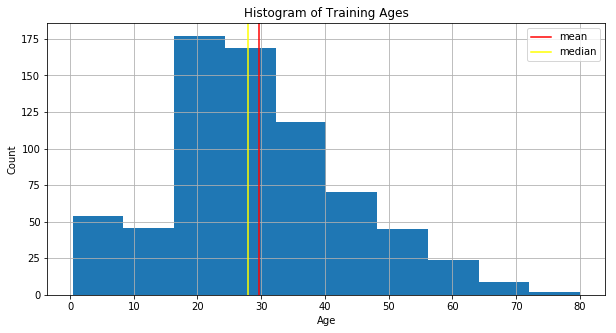

In [7]:
import matplotlib.pyplot as plt #Matplotlib is a great plotting tool 
#This helps our pictures show up inline 
plt.rcParams['figure.figsize'] = (10, 5)  #Sets a size for our graphs 

axes = train['Age'].hist()  #Plots a histogram of Age. 

#Vertical lines for mean and median 
axes.axvline(train['Age'].mean(), label="mean", c="red") 
axes.axvline(train['Age'].median(), label="median", c="yellow") 

#Labels 
axes.set_xlabel("Age") 
axes.set_ylabel("Count") 
axes.set_title("Histogram of Training Ages")
#Creates a legend 
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels); 

Seems that they are both pretty close to each other. There is a slight right-skew, and the median is closer to the visual "center" of the bell curve, so I'm going to use median to fill in the data. Use whichever you want! 

In [8]:
train.fillna(train.median(), inplace=True) 
test.fillna(train.median(), inplace=True) 

If you look closely at line 2 above, you'll see I used `train.median()` to fill in the test data. Why? Because in real life, you don't know test before-hand. Imagine if the test data is coming at you one at a time and you're trying to make predictions - there is no way of knowing the testing median. Therefore, we use what we know - the median of the train data - and use it to fill up test. 

Now, let's look at our histogram again. 

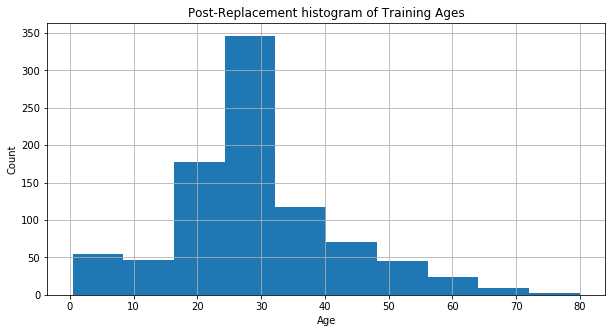

In [9]:
ax = train['Age'].hist()
ax.set_xlabel("Age") 
ax.set_ylabel("Count") 
ax.set_title("Post-Replacement histogram of Training Ages"); 

Notice a difference? The drawback of filling in values by using other values already in the dataset is that _biases increase_. My training set is inherently incomplete (I don't have the testing data) - any difference between the medians just got increased. Unfortunately, there is no perfect solution. It's up to the analyzer to decide whether or not it's worth it. 

**OneHot** Now, the easy part. We're going to one-hot encode the columns that need it: 
- `Sex` 
- `Pclass` 
 
If you chose to keep `Embarked` from before, then make sure you also one-hot encode that! 

In [10]:
#Fortunately, Pandas makes it easy for us using the get_dummies() function 
train = pd.get_dummies(data=train, columns=["Sex", "Pclass"]) #There's no inplace for this, 
test = pd.get_dummies(data=test, columns=["Sex", "Pclass"])   #So we must overwrite train and test. 

train.head(6) 

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1
6,0,28.0,0,0,8.4583,0,1,0,0,1


# Exploration 

Great! We know the basics of processing data, but now what? This section gets your toes wet with data analytics. First, we'll go over some common things to analyze, and discuss some properties of the aforementioned "things". 

## What am I Looking For 

## Why SIze Matters 

## Normal is a Virtue 

# Staying in Shape

# Pre-AI 

# Drawing the Line 

# 1's and 0's 

# The Neuron

# A Bunch of Neurons 

# Bunches of Bunches of Neurons 

# No Supervision Required 

# Stayin' Edgy 

# The Art of Language 

# Darwin was Right 

# The Cutting Edge 